/tmp/ipython-input-11-1023413623.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = pd.read_csv('/content/diabetic_data.csv').replace('?', np.nan)


              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1126
         1.0       0.34      0.18      0.23       249

    accuracy                           0.79      1375
   macro avg       0.59      0.55      0.55      1375
weighted avg       0.75      0.79      0.76      1375

ROC AUC: 0.6263811908379522


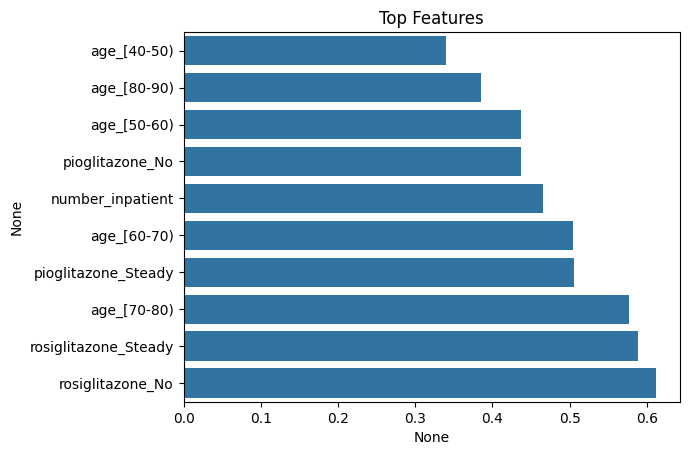

In [11]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler

# Load & preprocess
df = pd.read_csv('/content/diabetic_data.csv').replace('?', np.nan)
df = df[df['readmitted'] != '>30']  # Keep only <30 vs NO
df['readmitted'] = df['readmitted'].map({'<30':1, 'NO':0})

# Fill missing or drop, encode categories
df = pd.get_dummies(df.dropna(axis=1, thresh=len(df)*0.8), drop_first=True)

# Drop rows with missing values in the target variable
df.dropna(subset=['readmitted'], inplace=True)


# Split data
X = df.drop(['readmitted', 'encounter_id', 'patient_nbr'], axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]))

# Feature importance
# Use original X.columns for feature names as the scaled data is a numpy array
coefs = pd.Series(model.coef_[0], index=X.columns).sort_values()
top=10
sns.barplot(x=coefs[-top:], y=coefs[-top:].index)
plt.title('Top Features')

# Create directory if it doesn't exist
if not os.path.exists('plots'):
    os.makedirs('plots')

plt.savefig('plots/feature_importance.png')
plt.show()